# MNIST

This script implements a feedforward neural network on the classic MNIST data set.

# Imports

First, define our imported modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.14.0


# Define the dataset

Initialize the dataset -->
Dataset of 60,000 28x28 pixel grayscale images of 
the 10 digits, along with a test set of 10,000 images.

In [0]:
mnist = keras.datasets.mnist

x_train, x_test: array of grayscale image data with 
shape (num_samples, 28, 28)

y_train, y_test: array of digit labels 
(integers in range 0-9) with shape 

In [3]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Each image is mapped to a single label. Since the class 
names are not included with the dataset, store them here 
to use later when plotting the images

In [0]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

# Understand dataset

there are 60,000 images in the training set, with each image represented as 28 x 28 pixels

In [5]:
print('Shape of train_images:', train_images.shape)

Shape of train_images: (60000, 28, 28)


each label is an integer between 0 and 9

In [6]:
print('train_labels:', train_labels)

train_labels: [5 0 4 ... 5 6 8]


there are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels

In [7]:
print('Shape of test_images:', test_images.shape)

Shape of test_images: (10000, 28, 28)


and the test set contains 10,000 images labels

In [8]:
print('Length of test_labels:', len(test_labels))

Length of test_labels: 10000


inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

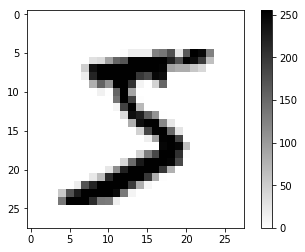

In [9]:
plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

Scale these values to a range of 0 to 1 before feeding
to the neural network model. For this, we divide the 
values by 255. It's important that the training set and the 
testing set are preprocessed in the same way

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and 
display the class name below each image. Verify that 
the data is in the correct format and we're ready to 
build and train the network

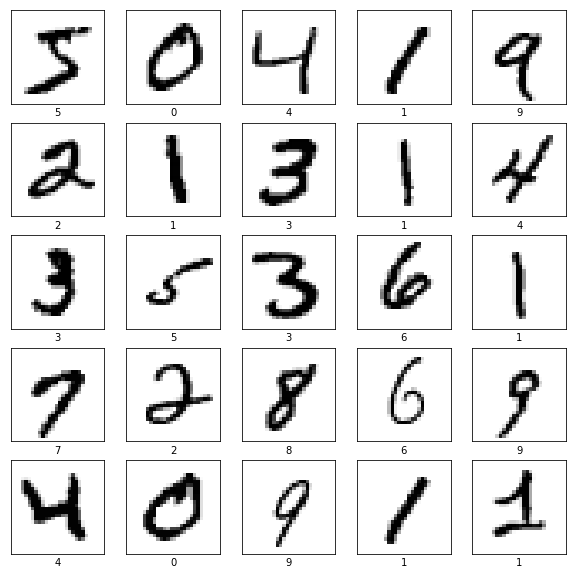

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

The basic building block of a neural network is the layer. 
Layers extract representations from the data fed into them. 
And, hopefully, these representations are more meaningful 
for the problem at hand

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(128, activation=tf.nn.relu), # fully connected hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])

W0730 06:58:11.003378 140106750269312 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


 The model's compile step:
- Loss function —This measures how accurate the model 
is during training. We want to minimize this function 
to "steer" the model in the right direction
- Optimizer —This is how the model is updated based 
on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps.
We want the accuracy, the fraction of the images that 
are correctly classified

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model

Training the neural network model requires the following steps:
1. Feed the training data to the model—in this example, 
the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in 
this example, the test_images array. We verify that the predictions 
match the labels from the test_labels array
4. To start training, call the model.fit method—the model 
is "fit" to the training data

In [14]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2564 - acc: 0.9281
Epoch 2/2
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1160 - acc: 0.9657


# Evaluate the model

Compare how the model performs on the test dataset

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.1014 - acc: 0.9682
Test accuracy: 0.9682


# Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

the model has predicted the label for each image in the testing set. Let's take a look at the first prediction

In [17]:
print('Prediction of the first image in test_images', predictions[0])

Prediction of the first image in test_images [8.0057853e-06 1.6778900e-07 3.1493211e-04 6.4872755e-03 2.4491639e-08
 1.3678891e-05 7.6761036e-10 9.9307632e-01 5.5412718e-05 4.4152926e-05]


prediction is an array of 10 numbers. These describe the "confidence" 
of the model that the image corresponds to each of the 10 different 
digits. We can see which label has the highest confidence value

In [18]:
print('Prediction label for the first image:', np.argmax(predictions[0]))

Prediction label for the first image: 7


We can check the test label to see this is correct

In [19]:
print('Actual label for the first image:', test_labels[0])

Actual label for the first image: 7


We can graph this to look at the full set of 10 class predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Let's look at the 0th image, predictions, and prediction array

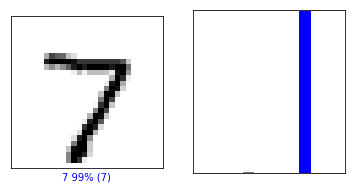

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct 
prediction labels are blue and incorrect prediction labels are 
red. The number gives the percent (out of 100) for the predicted 
label. Note that it can be wrong even when very confident.

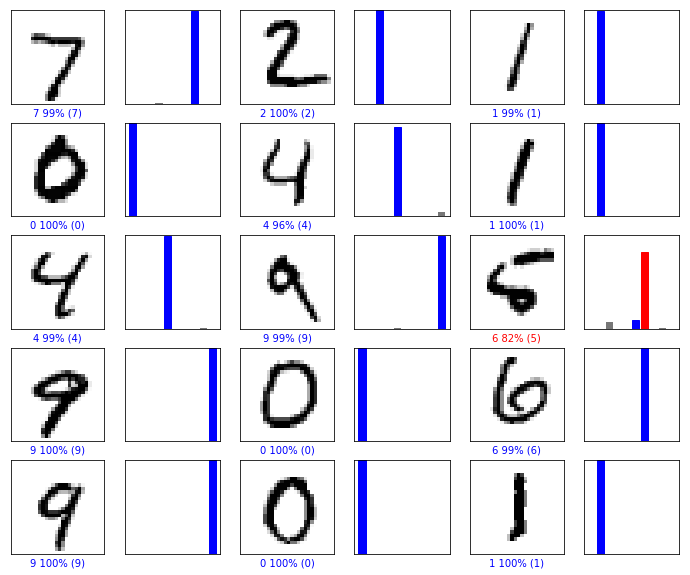

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image

In [23]:
img = test_images[0]
print('Shape of the test image:', img.shape)

Shape of the test image: (28, 28)


tf.keras models are optimized to make predictions on a 
batch, or collection,of examples at once. So even though 
we're using a single image, we need to add it to a list:

In [24]:
img = (np.expand_dims(img,0)) # add the image to a batch where it's the only member.
print('Shape of the bactch test image:', img.shape)

Shape of the bactch test image: (1, 28, 28)


Now predict the image

In [25]:
predictions_single = model.predict(img)
print('The predicted confidence array for the image is:', predictions_single)

The predicted confidence array for the image is: [[8.0057780e-06 1.6778900e-07 3.1493179e-04 6.4872694e-03 2.4491639e-08
  1.3678891e-05 7.6761181e-10 9.9307632e-01 5.5412667e-05 4.4152886e-05]]


display the confidence plot for the predicted image

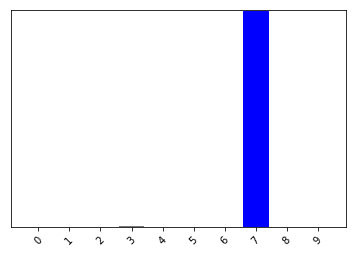

In [26]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch

In [27]:
prediction_result = np.argmax(predictions_single[0])
print('The predicted label for the image is:', prediction_result)

The predicted label for the image is: 7
